In [7]:
import pandas as pd 
import numpy as np 
import os, glob
import seaborn as sns
import matplotlib.pyplot as plt

# Amidar

In [8]:
env_name = "Amidar"
family = ["a2c","c51","ddqn","dqn","ppo","rainbow","vqn","vsarsa"]
dir = f"../../storage/results/intervention_performance_results/"

In [9]:
df_list = []
for fam in family:
    file = dir + f"{env_name}_{fam}_intvperf.csv"
    d = pd.read_csv(file, index_col=0)
    d["family"] = fam
    df_list.append(d)

df = pd.concat(df_list, ignore_index=True)


In [10]:
df.head()

,intervention,frame,mean_performance,mean_std,js_div,family
0,0,50000,29.345455,10.950372,2.128043,a2c
1,0,3000000,127.200000,28.102231,1.962461,a2c
2,0,5000000,147.145455,36.893043,1.880883,a2c
3,0,8000000,204.709091,51.912780,2.048881,a2c
4,0,10000000,213.781818,50.363020,1.920355,a2c


In [11]:
print(min(df["ce"]))
print(max(df["ce"]))
print(min(df["mean_performance"]))
print(max(df["mean_performance"]))

3.203426560311622e-16
3.1219280700475167
0.0
1364.9454545454546


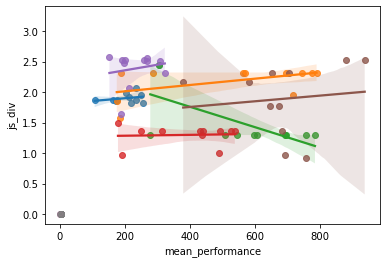

In [20]:
family = ["a2c","c51","ddqn","dqn","ppo","rainbow","vqn","vsarsa"]
checkpoints = [50000, 3000000, 5000000, 8000000, 10000000]
for fam in family: 
    for c in [10000000]: 
        f = df[(df["family"] == fam) & (df["frame"]==c) & (df["intervention"].isin([0,1,2,3,4,5,6,7,8,9,10]))]
        sns.regplot(x = f["mean_performance"], y = f["ce"])
        # plt.legend()
        # plt.title("Family: "+str(fam)+" Checkpoint: "+str(c))

/Users/pboddavarama/opt/anaconda3/envs/repro/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


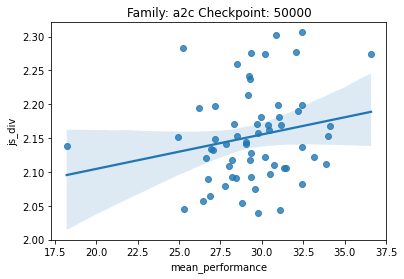

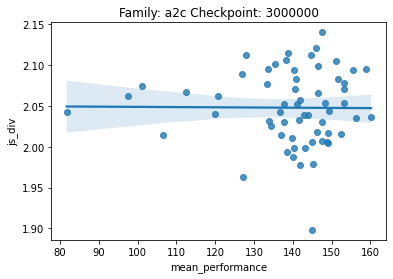

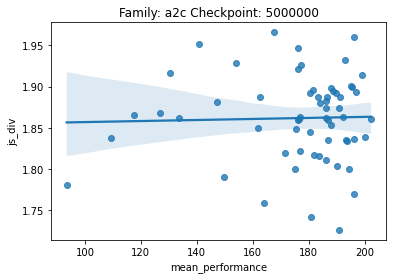

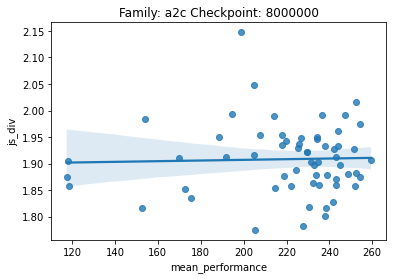

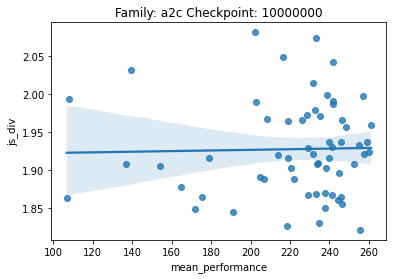

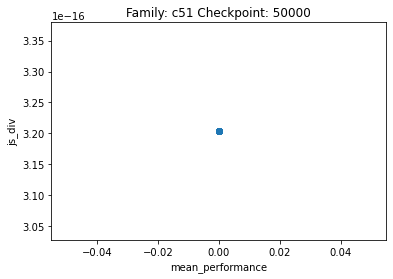

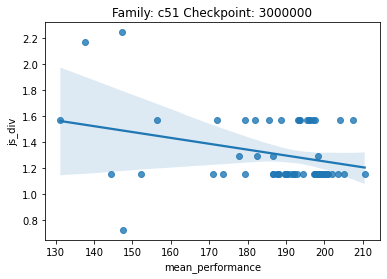

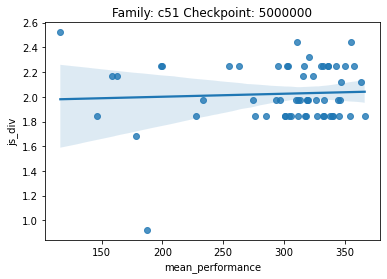

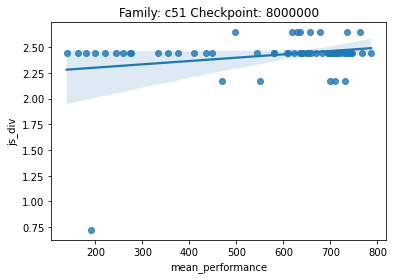

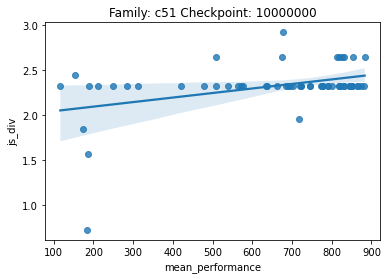

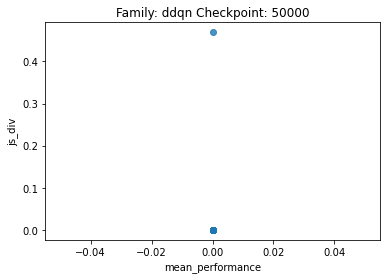

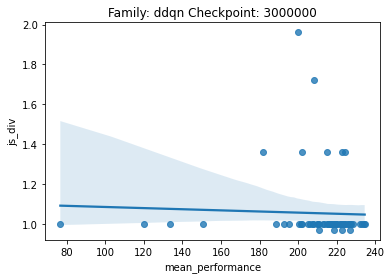

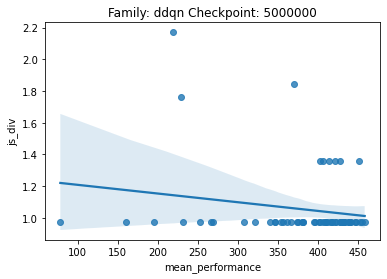

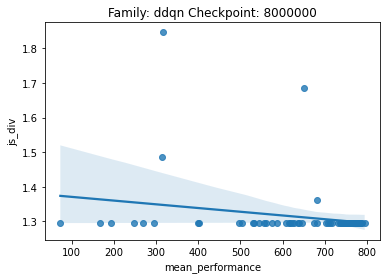

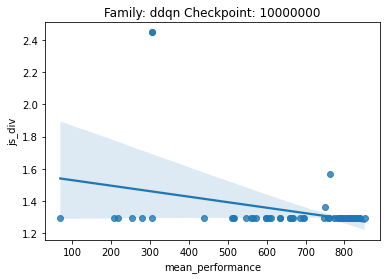

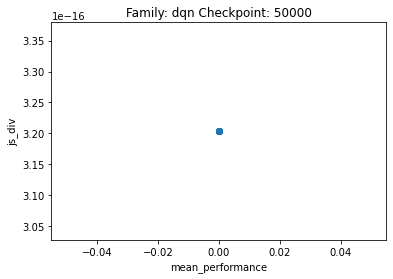

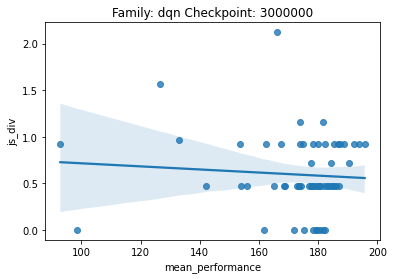

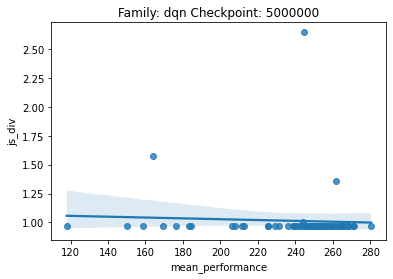

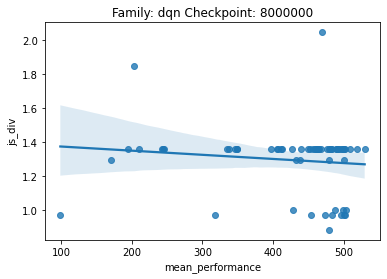

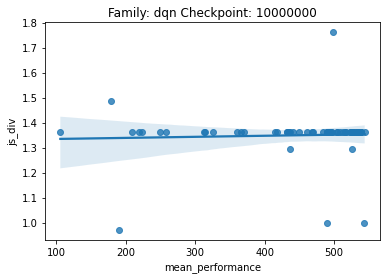

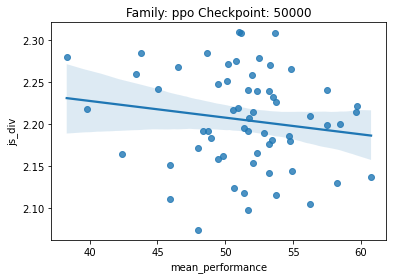

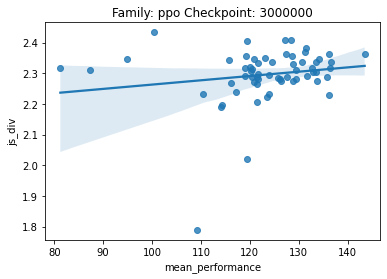

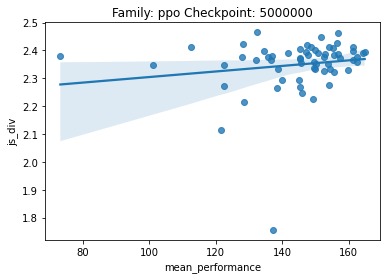

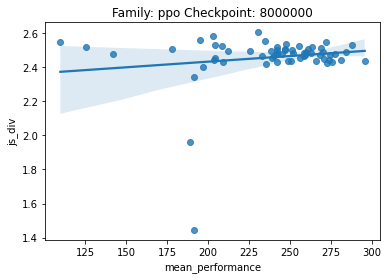

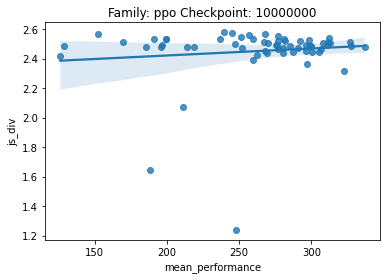

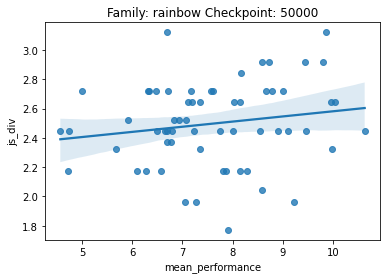

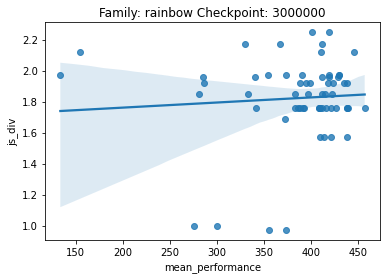

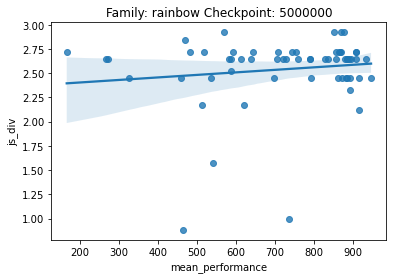

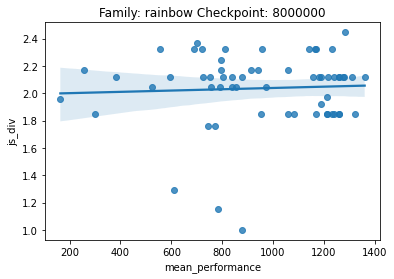

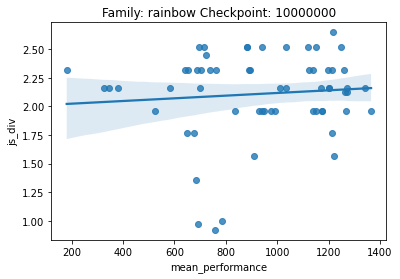

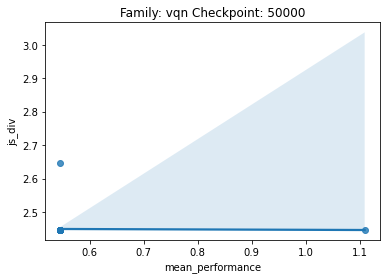

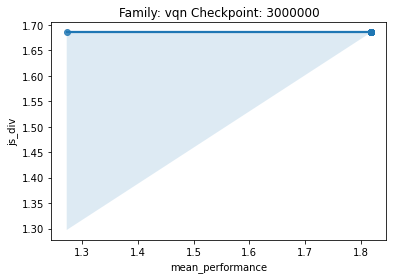

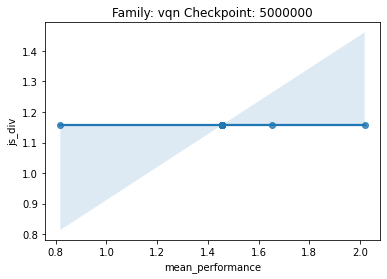

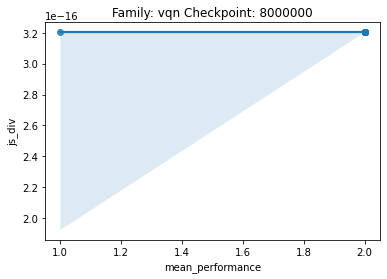

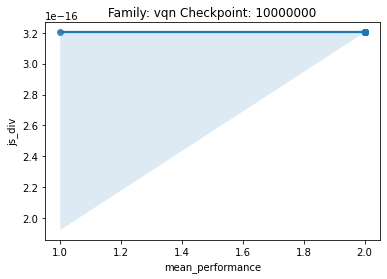

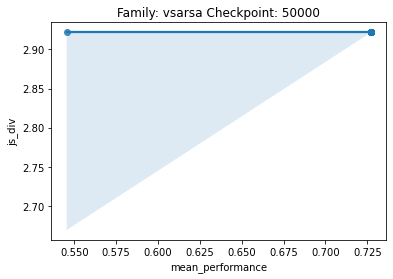

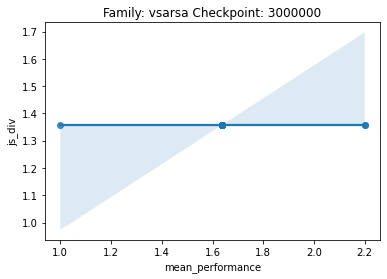

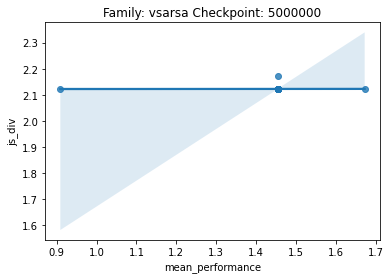

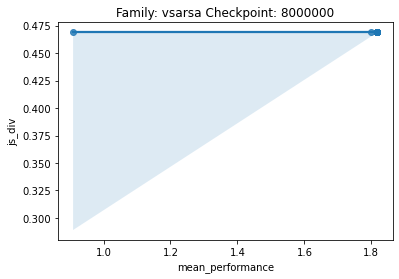

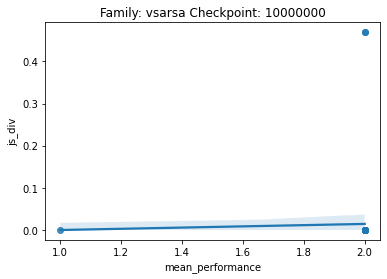

In [74]:
family = ["a2c","c51","ddqn","dqn","ppo","rainbow","vqn","vsarsa"]
checkpoints = [50000, 3000000, 5000000, 8000000, 10000000]
for fam in family: 
    for c in checkpoints: 
        f = df[(df["family"] == fam) & (df["frame"]==c)]
        plt.figure()
        sns.regplot(x = f["mean_performance"], y = f["ce"])
        plt.title("Family: "+str(fam)+" Checkpoint: "+str(c))

We pick one intervention from each "type" of intervention and see if there is a correlation between the mean performance across all the agents and the interventional robustness. 

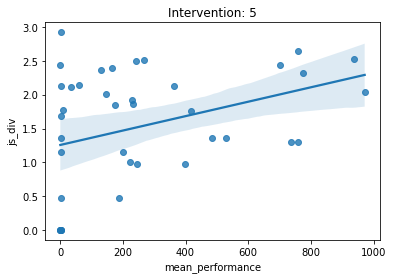

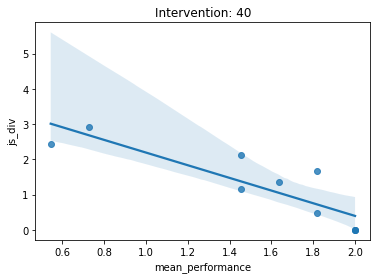

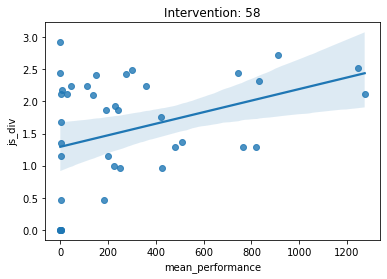

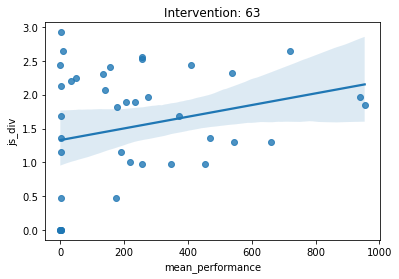

In [8]:
# Group by intervention for Amidar 
for iv in list([5,40,58,63]):
    f = df[df["intervention"] == iv]
    plt.figure()
    sns.regplot(x = f["mean_performance"], y = f["ce"])
    plt.title("Intervention: "+str(iv))

   intervention  correlation
0             0     0.208927
1             1     0.158947
2             2     0.135757
3             3     0.296307
4             4     0.300320


Text(0, 0.5, 'Correlation')

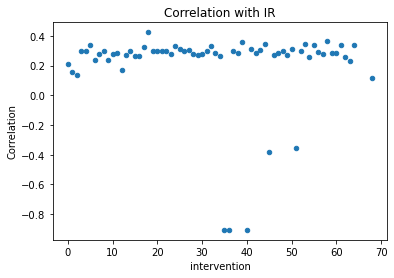

In [39]:
c = pd.DataFrame(df.groupby("intervention")[["mean_performance","ce"]].corr(method="spearman").iloc[0::2,-1])
c.index = c.index.get_level_values(0)
c = c.reset_index()
c = c.rename(columns={"ce":"correlation"})
print(c.head())
p = c.plot.scatter(x="intervention", y="correlation")
plt.title("Correlation of mean_performance with IR")
plt.ylabel("Correlation")

<AxesSubplot:>

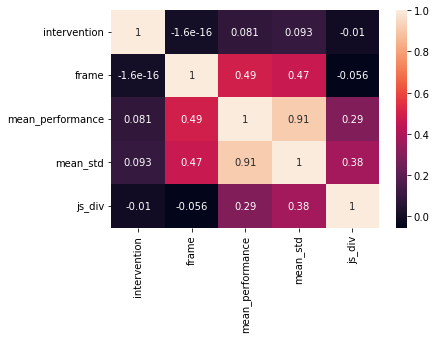

In [31]:
import matplotlib.pyplot as plt 
hm = sns.heatmap(df.corr(), annot=True)
hm

# SpaceInvaders
Correlation between interventions, mean_performance and the IR values for SpaceInvaders

/Users/pboddavarama/opt/anaconda3/envs/repro/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


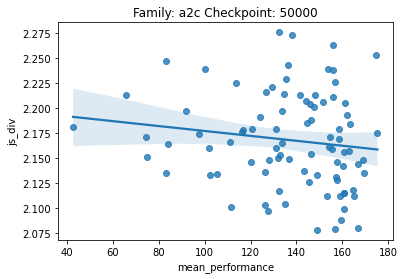

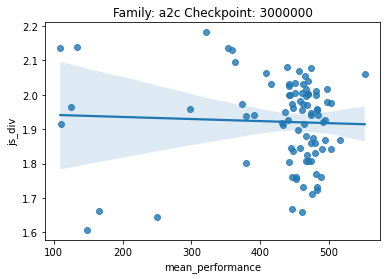

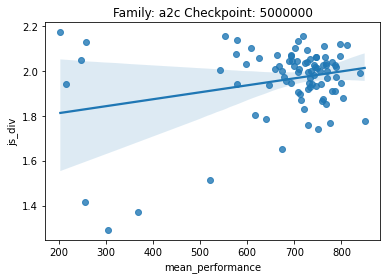

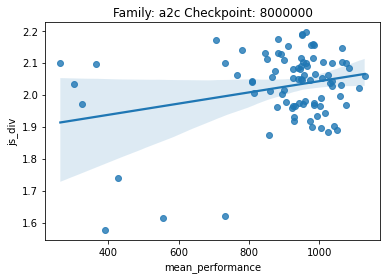

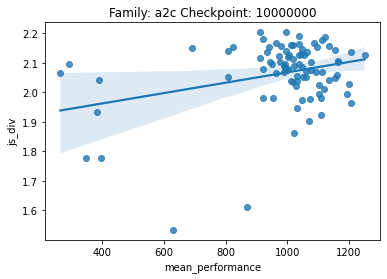

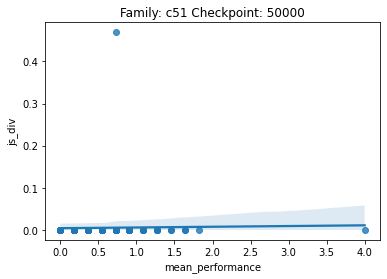

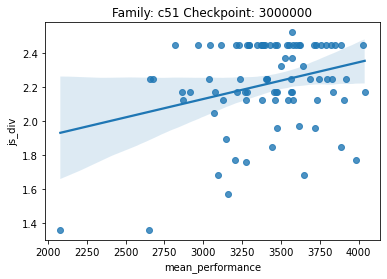

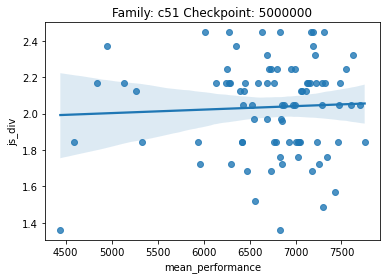

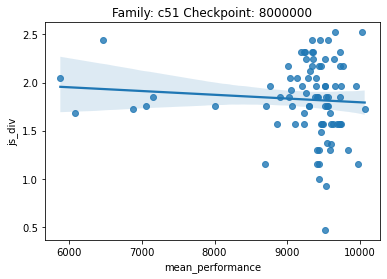

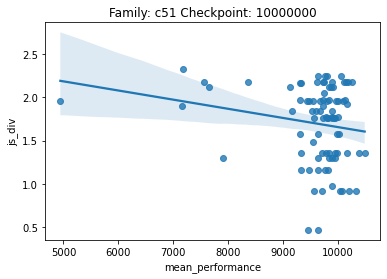

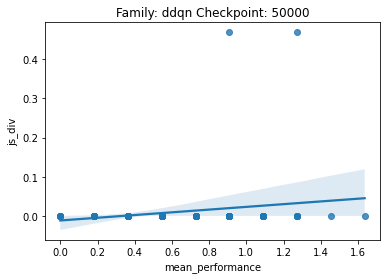

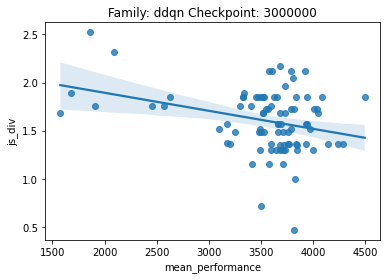

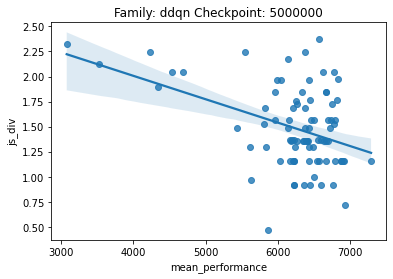

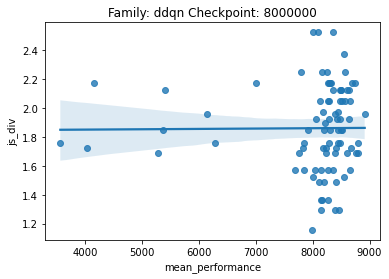

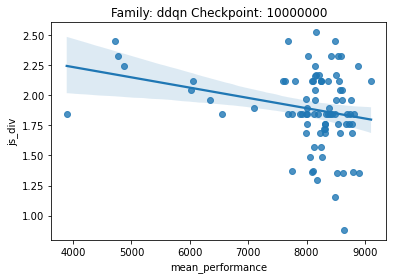

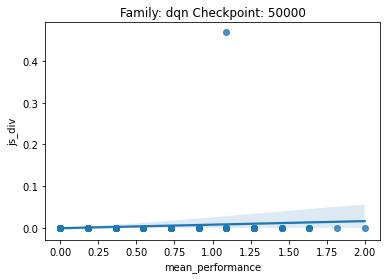

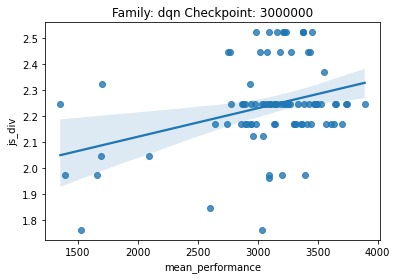

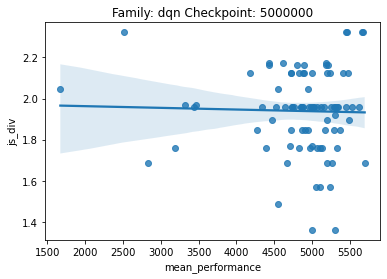

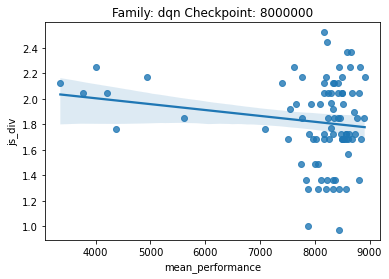

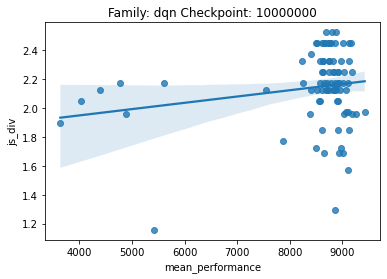

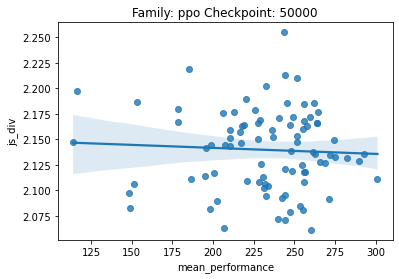

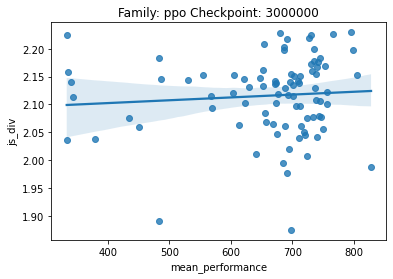

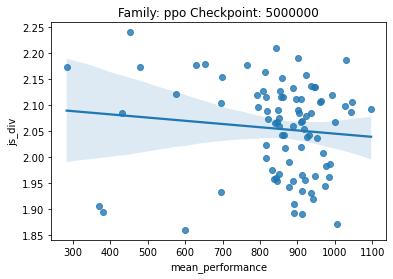

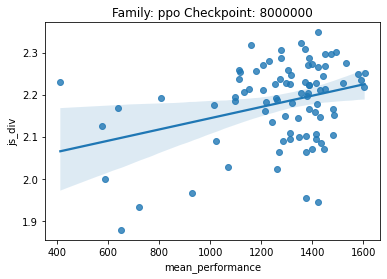

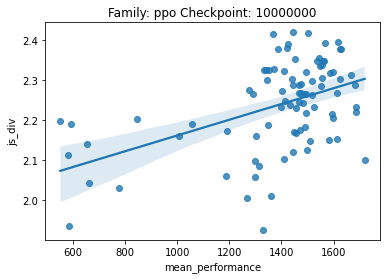

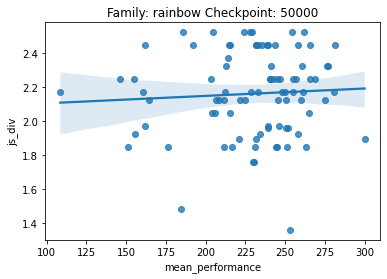

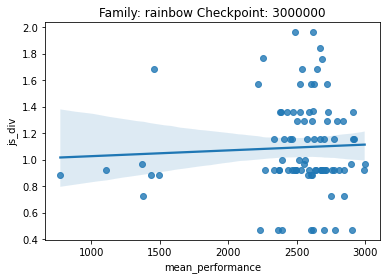

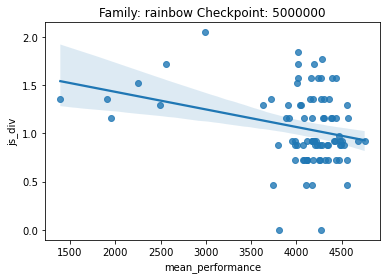

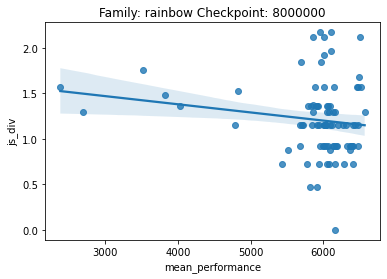

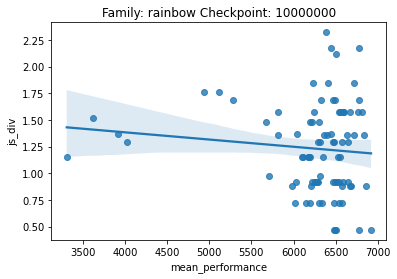

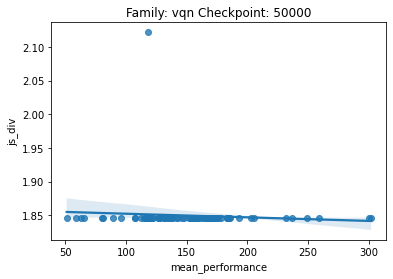

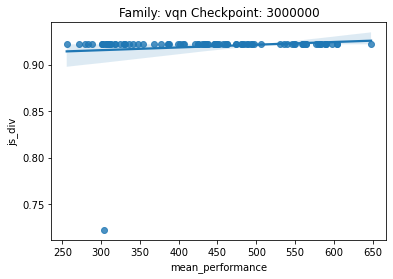

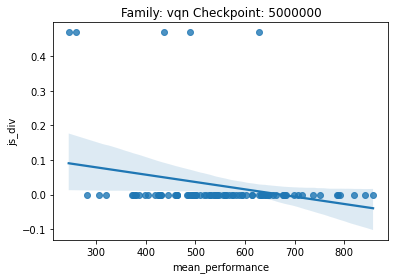

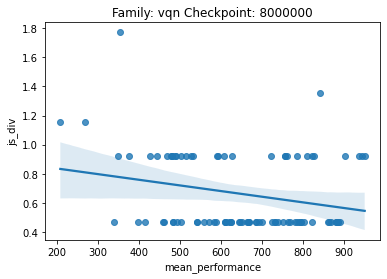

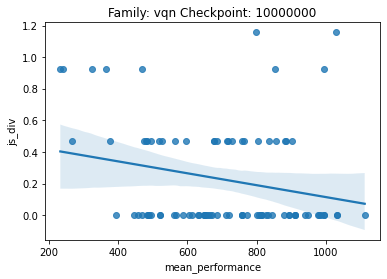

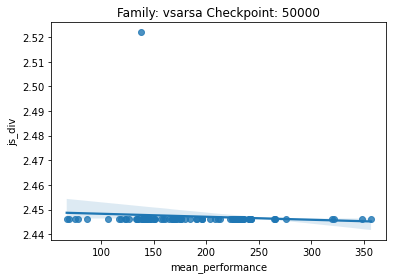

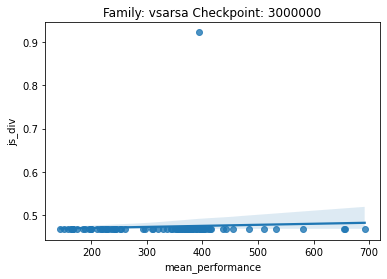

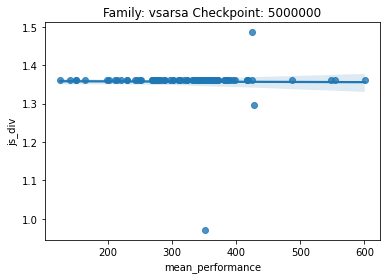

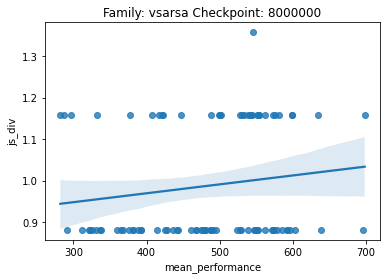

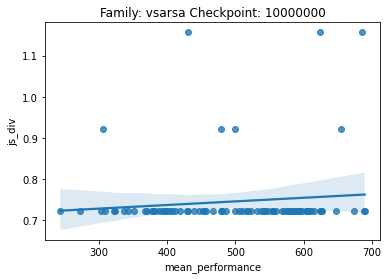

In [5]:
env_name = "SpaceInvaders"
family = ["a2c","c51","ddqn","dqn","ppo","rainbow","vqn","vsarsa"]
dir = f"../../storage/results/intervention_performance/" 

df_list = []
for fam in family:
    file = dir + f"{env_name}_{fam}_intvperf.csv"
    d = pd.read_csv(file, index_col=0)
    d["family"] = fam
    df_list.append(d)

df = pd.concat(df_list, ignore_index=True)

family = ["a2c","c51","ddqn","dqn","ppo","rainbow","vqn","vsarsa"]
checkpoints = [50000, 3000000, 5000000, 8000000, 10000000]
for fam in family: 
    for c in checkpoints: 
        f = df[(df["family"] == fam) & (df["frame"]==c)]
        plt.figure()
        sns.regplot(x = f["mean_performance"], y = f["ce"])
        plt.title("Family: "+str(fam)+" Checkpoint: "+str(c))

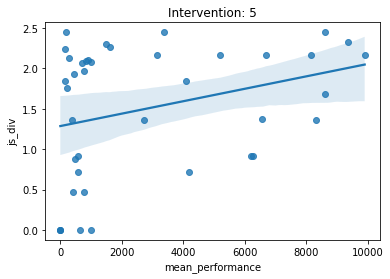

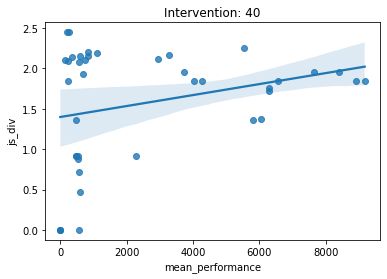

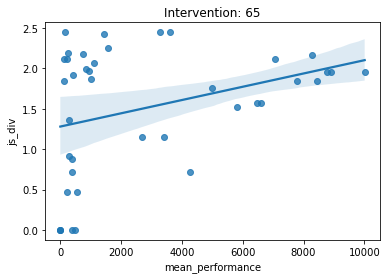

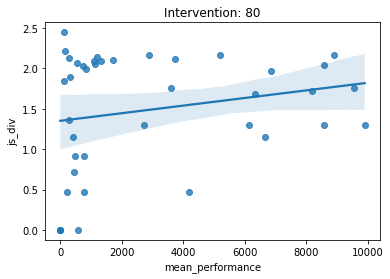

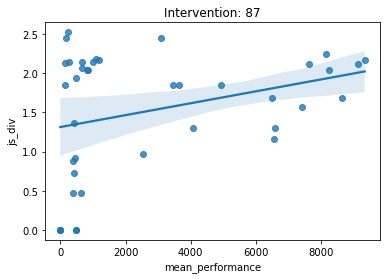

In [6]:
# Group by intervention for Amidar 
for iv in list([5,40,65,80,87]):
    f = df[df["intervention"] == iv]
    plt.figure()
    sns.regplot(x = f["mean_performance"], y = f["ce"])
    plt.title("Intervention: "+str(iv))